# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict ## for customised function 

## Importing Data Visualisation Libraries

import matplotlib.pyplot as plt
import seaborn as sns

## Importing Statistics Libraries

import scipy.stats as sci

## Ignore Warnings

import warnings 
warnings.filterwarnings('ignore')

## Machine Learning Libraries

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

## Importing Validition Metrics

from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_excel("Capstone Project Data.xlsx")
df2 = df.copy() ## creating another set of copy of DF.

In [3]:
df2.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df2.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [5]:
df2.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Preparing Custom EDA Report

In [6]:
def custom_summary(data):
    result=[] # empty list
    for col in data.columns:
        stats= OrderedDict({"column_name":col, 
                            "count":data[col].count(),
                            "data type":data[col].dtype,
                            "minimum":data[col].min(),
                            "Quartile 1":data[col].quantile(0.25),
                            "mean":data[col].mean(),
                            "median":data[col].median(),
                            "Quartile 3":data[col].quantile(0.75),
                            "maximum":data[col].max(),
                            "variance":data[col].var(),
                            "standard deviation":data[col].std(), 
                            "IQR":data[col].quantile(0.75)-data[col].quantile(0.25),
                            "skewness": data[col].skew(),
                            "Kurtosis": data[col].kurt(),
                            })
        result.append(stats)

        ## Skewness Commment

        if data[col].skew() <1 :
            sk_label = "highly Negatively Skew"
        elif -1 <= data[col].skew() < -0.5:
            sk_label = "Moderately Negatively Skew"
        elif -0.5 <= data[col].skew() < 0:
            sk_label = "Fairly Symmetric (Negative)"
        elif 0 <= data[col].skew() <0.5:
            sk_label = " Fairly Symmetric (Positive) "
        elif 0.5 <= data[col].skew() < 1:
            sk_label = "Moderately Positive "
        elif data[col].skew() >1 :
            sk_label = "Highly Positively Skew"  
        else:
            sk_label =" Error"
        stats['Skewness comment'] = sk_label

        ## Outlier Comment

        upperlim = stats['Quartile 3'] + (1.5*stats['IQR'])
        lowerlim = stats['Quartile 1'] - (1.5*stats['IQR'])
        if len([x for x in data[col] if x < lowerlim or x > upperlim ]) > 0:
            outliercomments = "Has Outlier"
        else:
            outliercomments = " Has No Outlier"
        stats['Outlier Comment'] = outliercomments
    result_df = pd.DataFrame(result)
    return result_df

In [7]:
custom_summary(df)

,column_name,count,data type,minimum,Quartile 1,mean,median,Quartile 3,maximum,variance,standard deviation,IQR,skewness,Kurtosis,Skewness comment,Outlier Comment
0,cement,1030,float64,102.00,192.375,281.167864,272.900,350.000,540.0,10921.580220,104.506364,157.625,0.509481,-0.520652,highly Negatively Skew,Has No Outlier
1,slag,1030,float64,0.00,0.000,73.895825,22.000,142.950,359.4,7444.124812,86.279342,142.950,0.800717,-0.508175,highly Negatively Skew,Has Outlier
2,ash,1030,float64,0.00,0.000,54.188350,0.000,118.300,200.1,4095.616541,63.997004,118.300,0.537354,-1.328746,highly Negatively Skew,Has No Outlier
3,water,1030,float64,121.80,164.900,181.567282,185.000,192.000,247.0,456.002651,21.354219,27.100,0.074628,0.122082,highly Negatively Skew,Has Outlier
4,superplastic,1030,float64,0.00,0.000,6.204660,6.400,10.200,32.2,35.686781,5.973841,10.200,0.907203,1.411269,highly Negatively Skew,Has Outlier
5,coarseagg,1030,float64,801.00,932.000,972.918932,968.000,1029.400,1145.0,6045.677357,77.753954,97.400,-0.040220,-0.599016,highly Negatively Skew,Has No Outlier
6,fineagg,1030,float64,594.00,730.950,773.580485,779.500,824.000,992.6,6428.187792,80.175980,93.050,-0.253010,-0.102177,highly Negatively Skew,Has Outlier
7,age,1030,int64,1.00,7.000,45.662136,28.000,56.000,365.0,3990.437729,63.169912,49.000,3.269177,12.168989,Highly Positively Skew,Has Outlier
8,strength,1030,float64,2.33,23.710,35.817961,34.445,46.135,82.6,279.081814,16.705742,22.425,0.416977,-0.313725,highly Negatively Skew,Has Outlier


## Outlier Detection Plots (ODTs)

## Outlier Replacement Function.

In [8]:
def replaceoutlier(data , col,method = "Quartile",strategy = "median"):
    col_data = data[col]
    if method == "Quartile": ## to be followed when Quartile is choosen
        Q2 = data[col].median()
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        upperlim = Q3 + (1.5*IQR) 
        lowerlim = Q1 - (1.5*IQR)
        
        ## Using Standard Deviation to set Values.
        
    elif method == "Standard Deviation": 
        col_mean = data[col].mean()
        col_sd = data[col].std()
        cutoff = col_sd*2
        upperlim = col_mean+cutoff
        lowerlim = col_mean-cutoff
        
    else:
        
        print("Error : Pass a Correct Method ")
            
     ## Printing Outliers 
    
    Outliers = data.loc[(col_data < lowerlim) | (col_data > upperlim),col]
    outlier_destiny = round((len(Outliers)/len(data))*100,2)
    if len(Outliers)==0:
        print(f' Feature \'{col}\' Does not have any outliers')
    else:
        print(f' Total Number of Outliers are:{len(Outliers)}\n ')
        print(f' Outlier Percentage : {outlier_destiny}\n')
        print(f' Outliers for \'{col}\'are:{np.sort(np.array(Outliers))}\n' )
        display(data[(col_data < lowerlim) | (col_data > upperlim)])
        
    ## Replacing Outliers
    
    if strategy == "median":
        data.loc[(col_data < lowerlim) | (col_data > upperlim),col] = Q2
    elif strategy == "mean":
         data.loc[(col_data < lowerlim) | (col_data > upperlim),col] = col_mean
    else:
        print("ERROR : Pass a Correct Strategy")
    return data
    

        
        

In [9]:
def outliersplots(data,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize =(20,10) )
    kwargs = {'fontsize': 20 , 'color': 'Black'}
    
    ## Descriptive Stats: Boxplot
    
    sns.boxplot(data[col], ax= ax1,orient = 'v',color = 'red' )
    ax1.set_title(col +  " Boxplot" , **kwargs)
    ax1.set_xlabel("Boxplot", **kwargs)
    ax1.set_ylabel("Values" , **kwargs)
    
    
    ## Plotting Histogram with Outliers
    
    sns.distplot(data[col], ax=ax2, color='red', fit= sci.norm )
    ax2.axvline(data[col].mean() , color = 'green')
    ax2.axvline(data[col].median(), color = 'black',linestyle = 'dashed')
    ax2.set_title(col +  " Distribution with Outliers" , **kwargs)
    ax2.set_xlabel("Density", **kwargs)
    ax2.set_ylabel("Values" , **kwargs)
    
    ## Plotting histogram with Outliers
    
    y = replaceoutlier(data,col)
    sns.distplot(y[col], ax=ax3, color='red', fit= sci.norm )
    ax3.axvline(y[col].mean() , color = 'green')
    ax3.axvline(y[col].median(), color = 'black',linestyle = 'dashed')
    ax3.set_title(col +  " Distribution with out Outliers" , **kwargs)
    ax3.set_xlabel("Density", **kwargs)
    ax3.set_ylabel("Values" , **kwargs)
    
    plt.show()
    
    

 Feature 'cement' Does not have any outliers


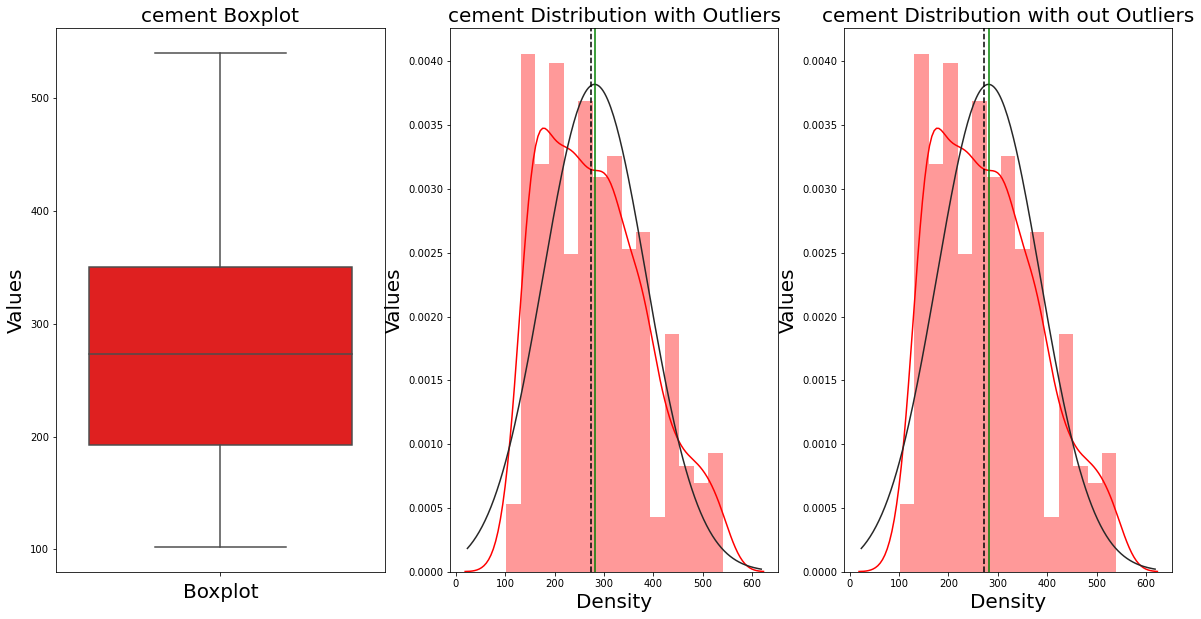

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


 Total Number of Outliers are:2
 
 Outlier Percentage : 0.19

 Outliers for 'slag'are:[359.4 359.4]



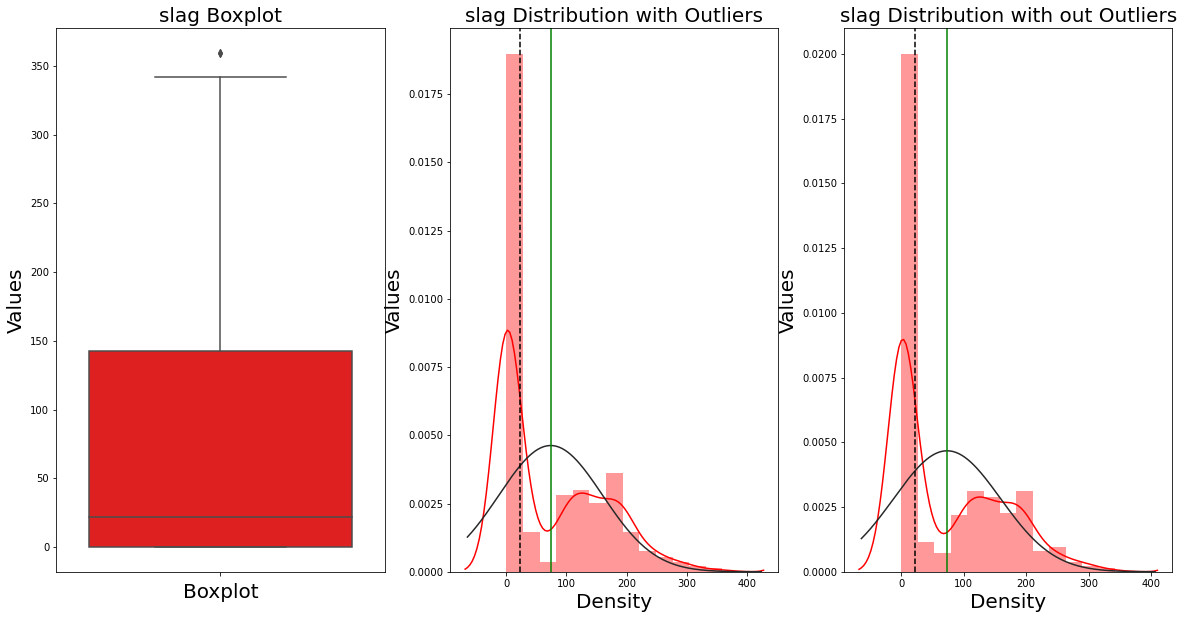

 Feature 'ash' Does not have any outliers


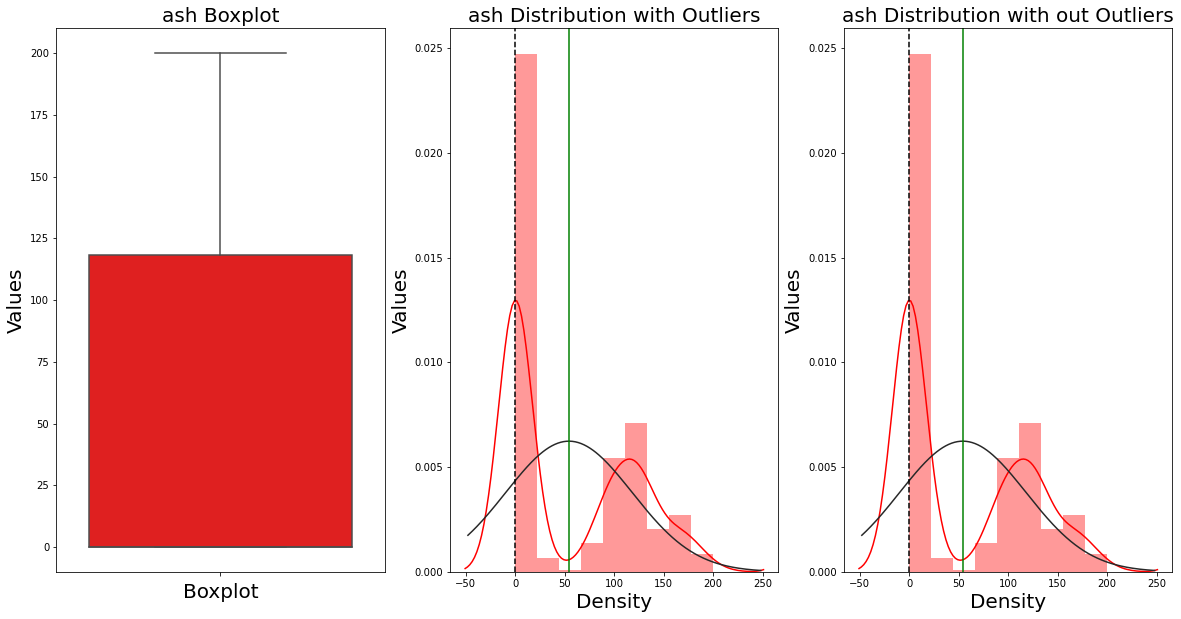

 Total Number of Outliers are:9
 
 Outlier Percentage : 0.87

 Outliers for 'water'are:[121.8 121.8 121.8 121.8 121.8 236.7 237.  246.9 247. ]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


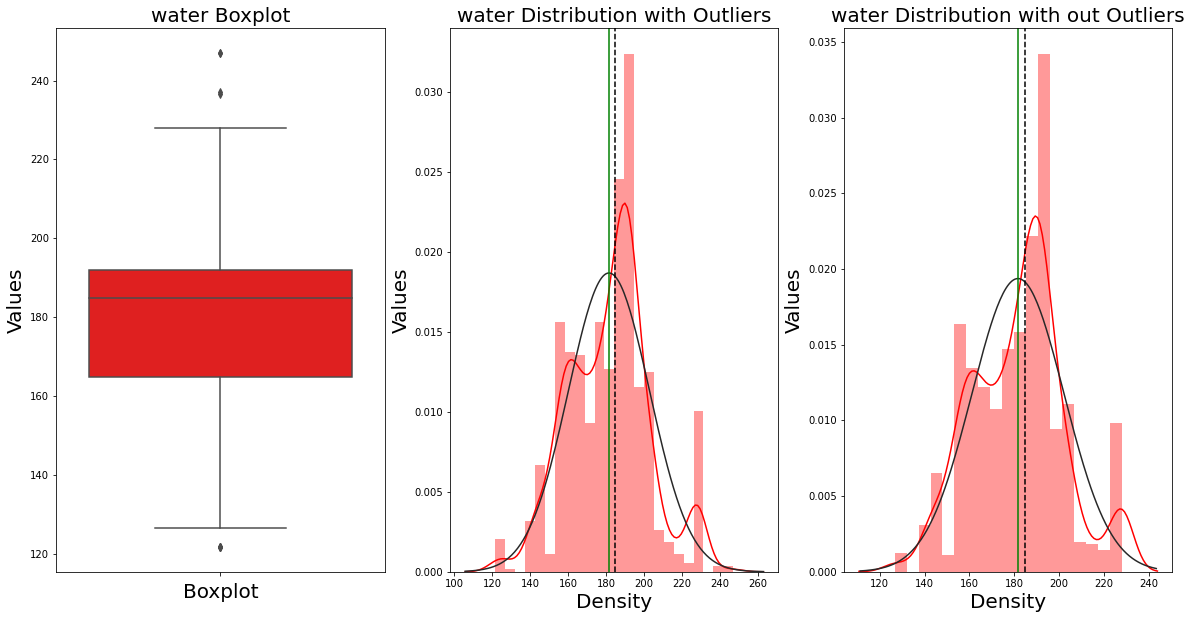

 Total Number of Outliers are:10
 
 Outlier Percentage : 0.97

 Outliers for 'superplastic'are:[28.2 28.2 28.2 28.2 28.2 32.2 32.2 32.2 32.2 32.2]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


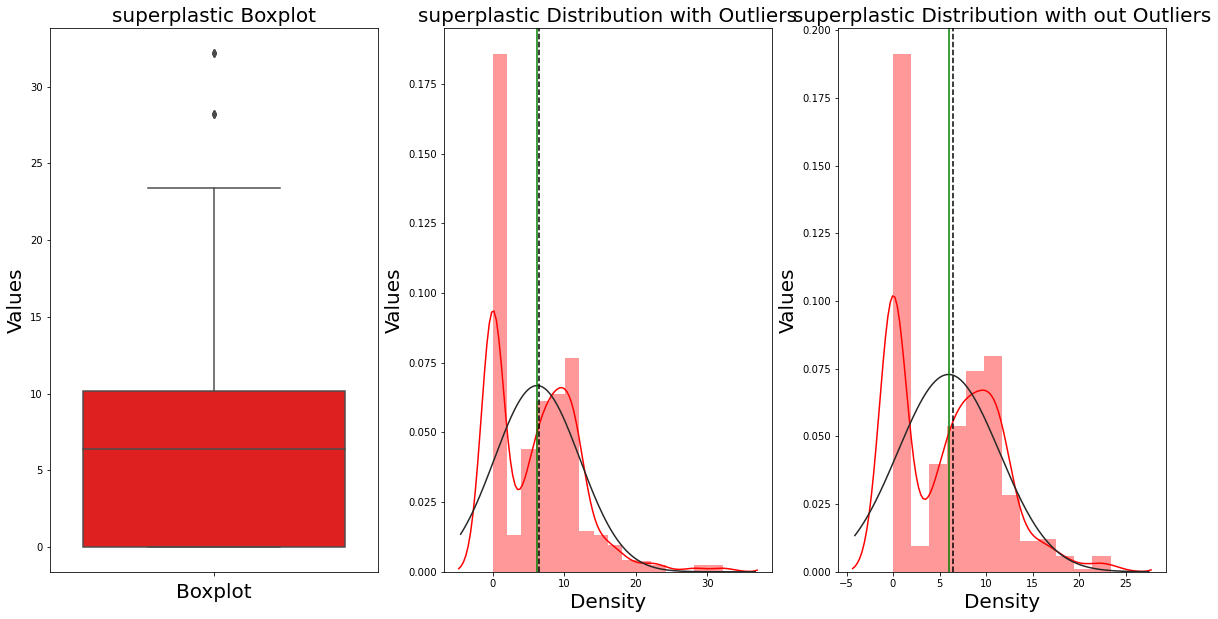

 Feature 'coarseagg' Does not have any outliers


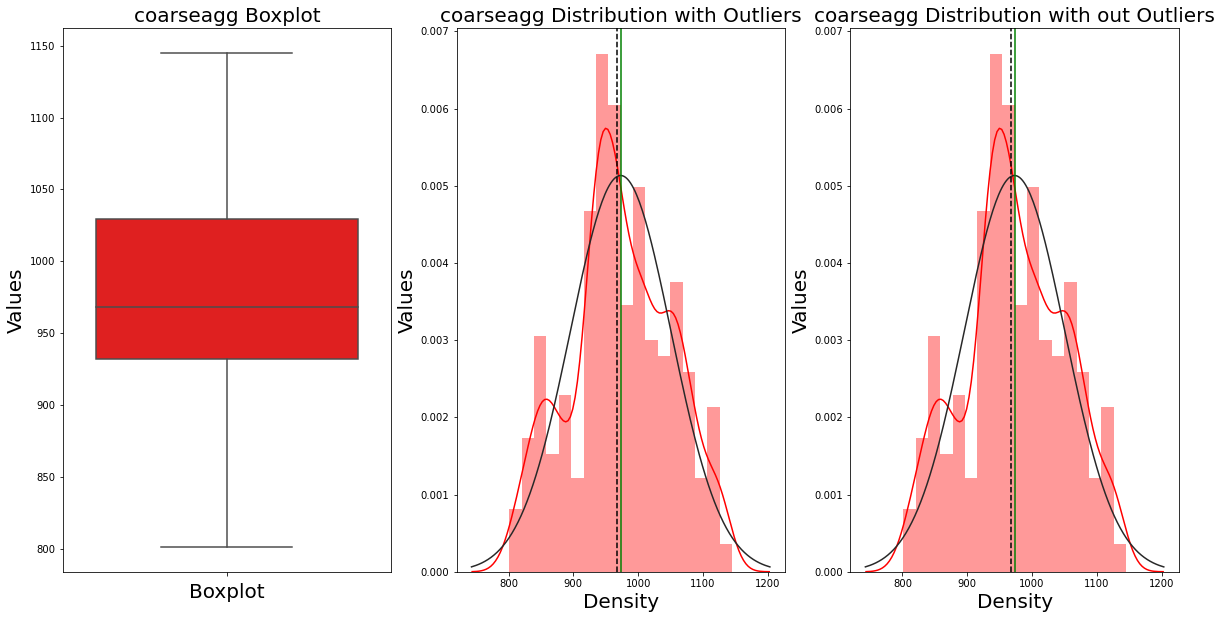

 Total Number of Outliers are:5
 
 Outlier Percentage : 0.49

 Outliers for 'fineagg'are:[992.6 992.6 992.6 992.6 992.6]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


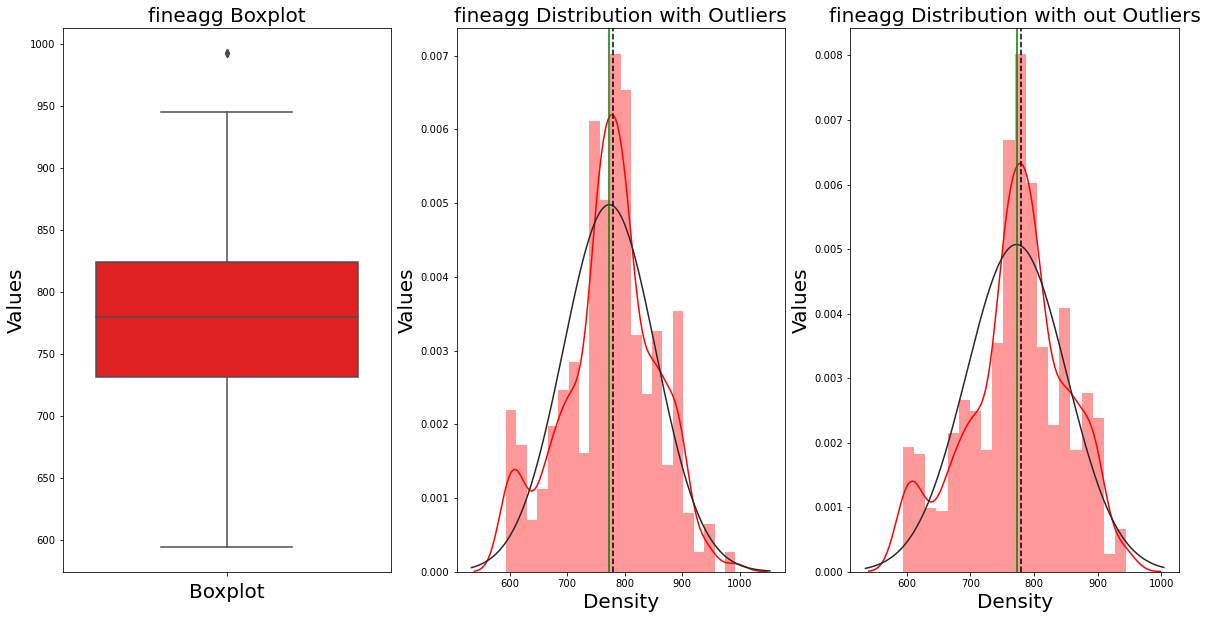

 Total Number of Outliers are:59
 
 Outlier Percentage : 5.73

 Outliers for 'age'are:[180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 270 270 270 270 270 270 270 270 270 270
 270 270 270 360 360 360 360 360 360 365 365 365 365 365 365 365 365 365
 365 365 365 365 365]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


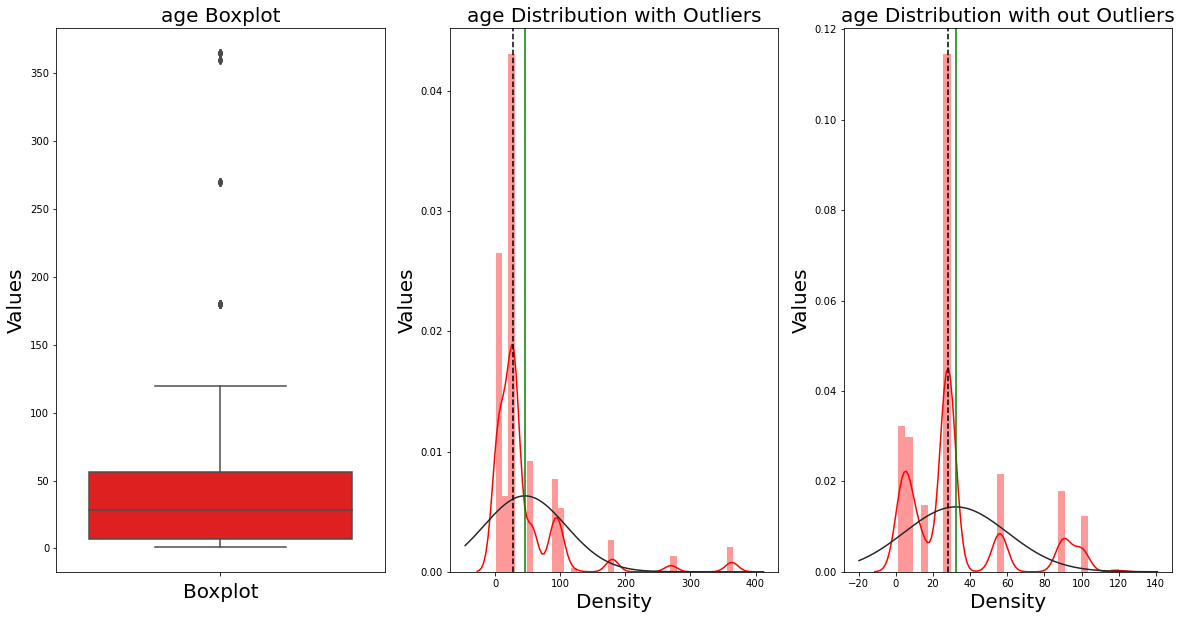

 Total Number of Outliers are:4
 
 Outlier Percentage : 0.39

 Outliers for 'strength'are:[79.99 80.2  81.75 82.6 ]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28.0,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91.0,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56.0,80.20


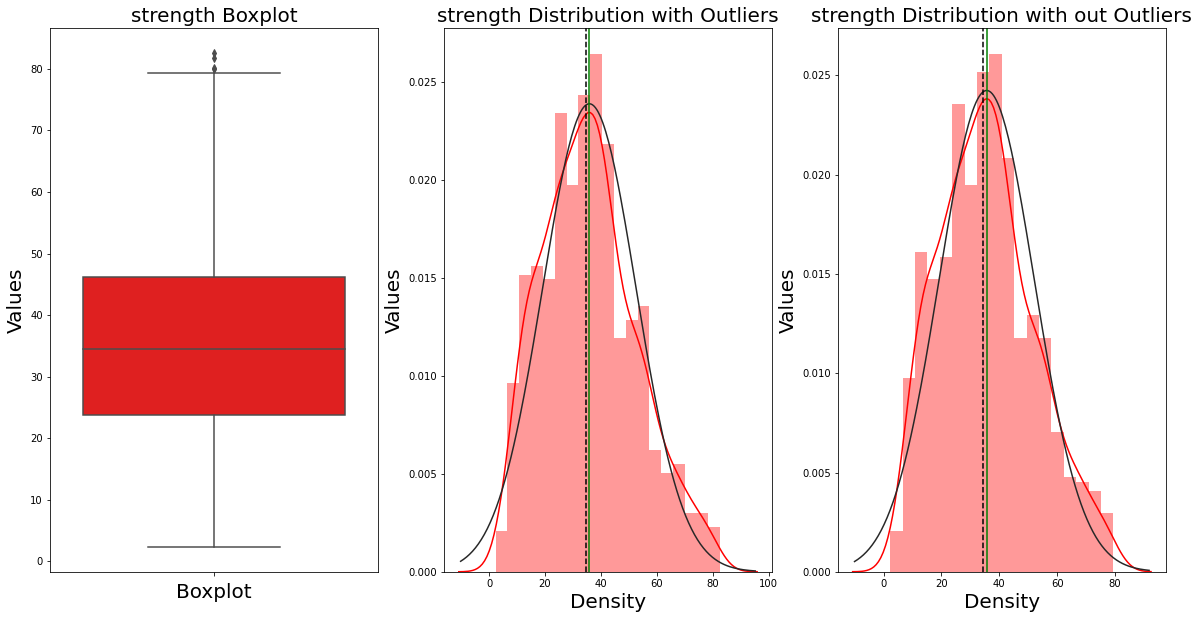

In [10]:
for col in df.columns:
    outliersplots(df,col)

## Function For Missing values

In [11]:
df.isnull().sum() ## Checking whether null values is there or not... so no null values 

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

# Exploring Relationship Or Feature Interaction

### 1.  Using Pairplots.

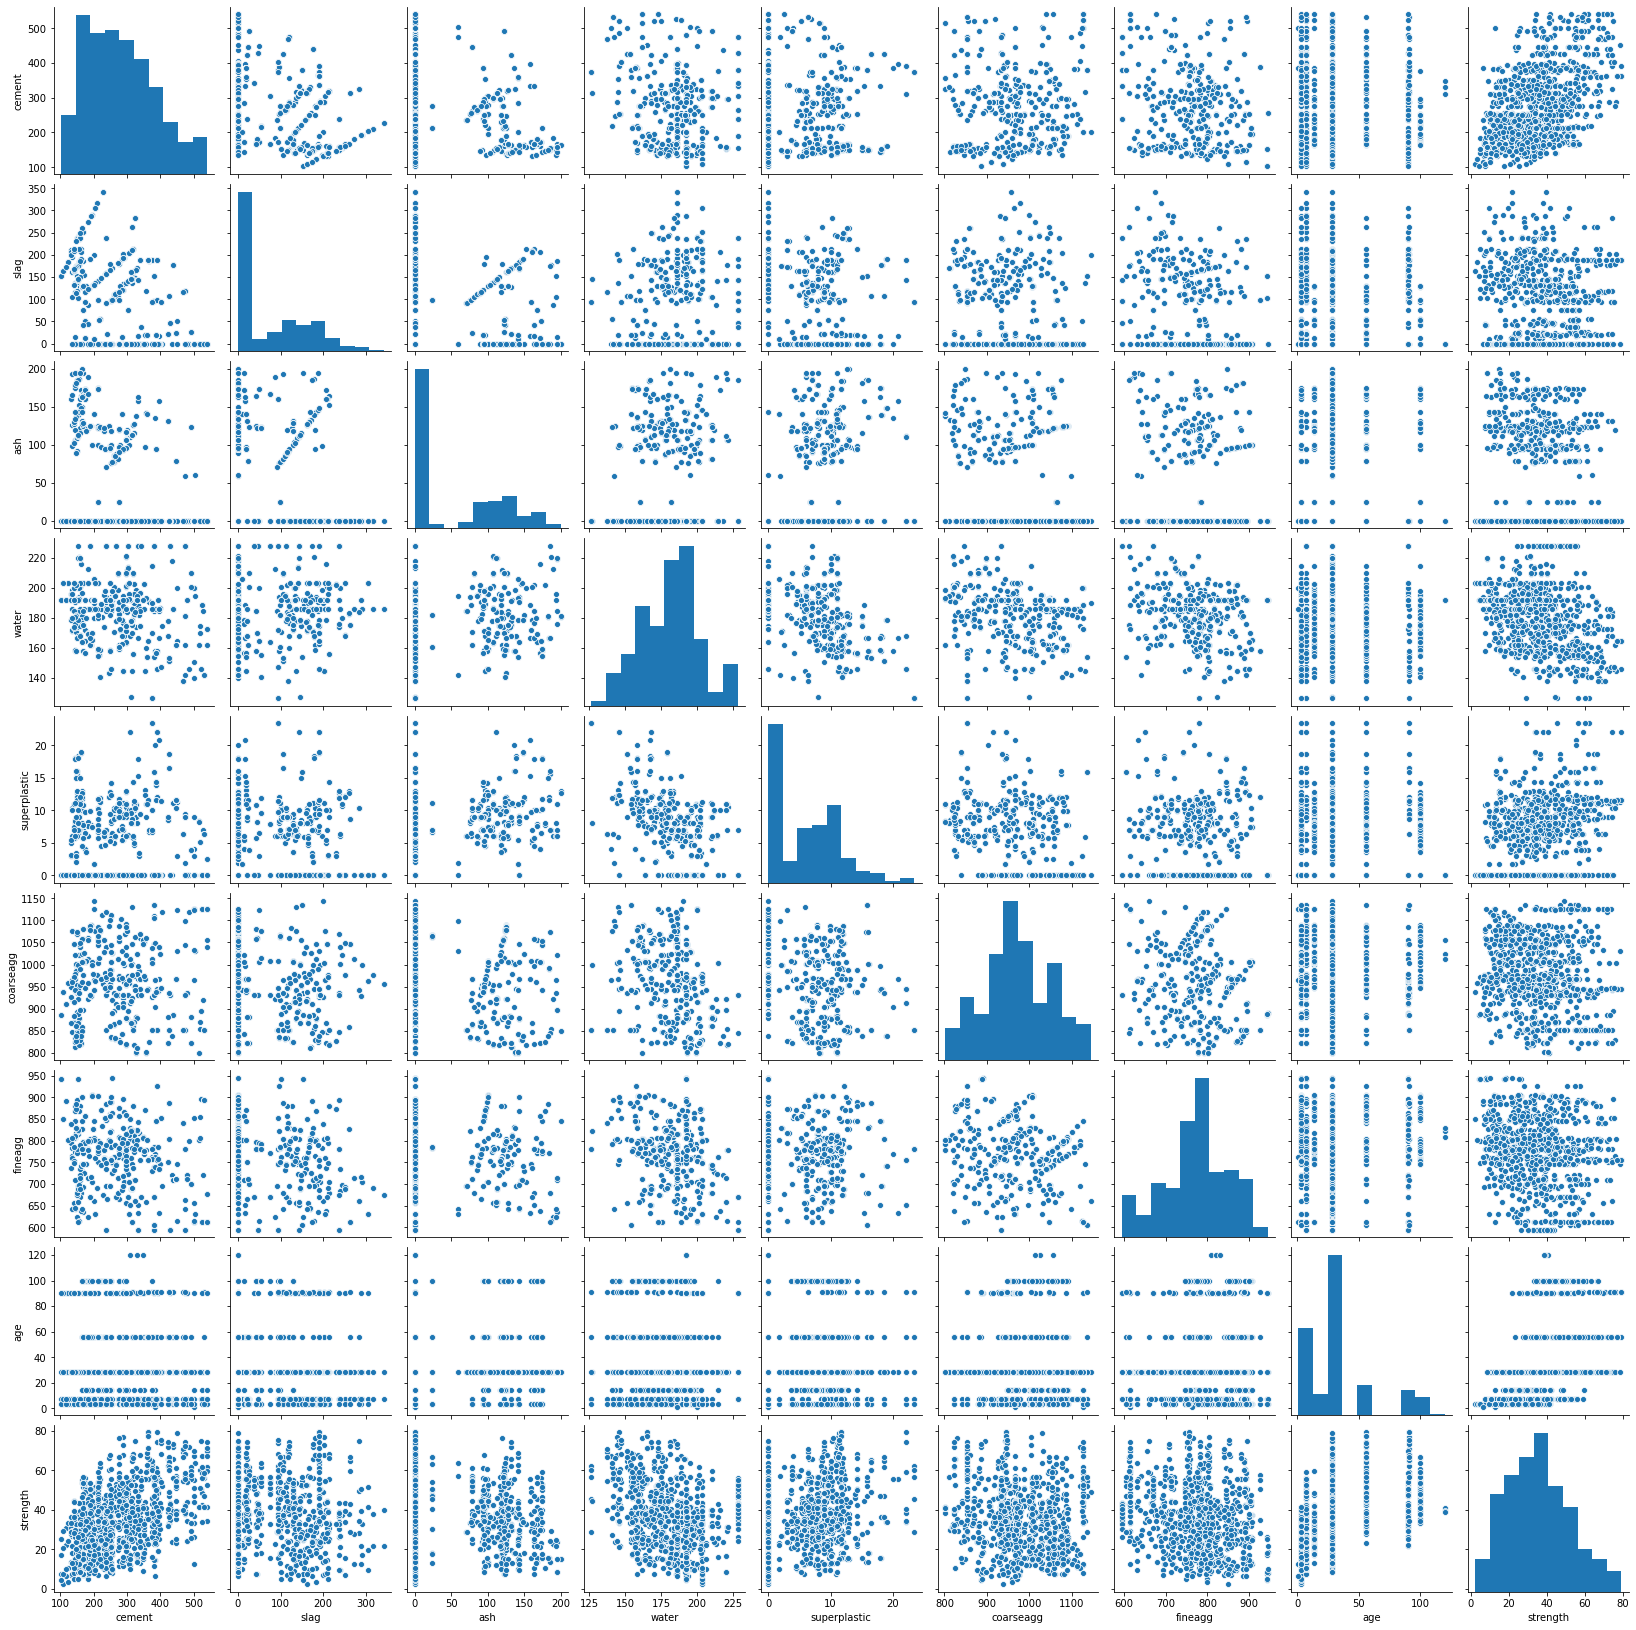

In [12]:
sns.pairplot(df) ## scatter plot between all the features(variate)

In [13]:
## Interperation
## above explains the relationship between various features..
## age is behaving as a categorical data ( from the graph , it has distrubed into groups or bins)

### 2. Multivariate Analysis using Regresssion

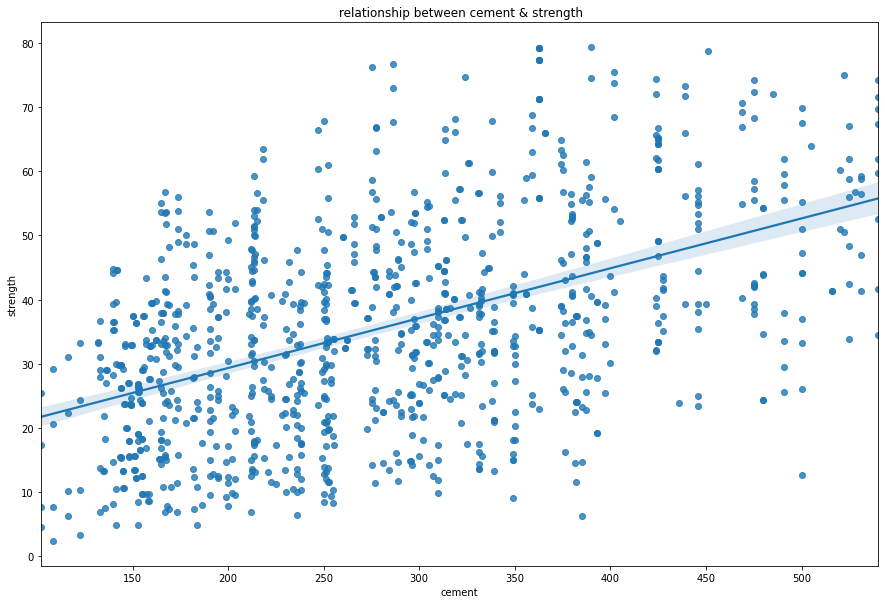

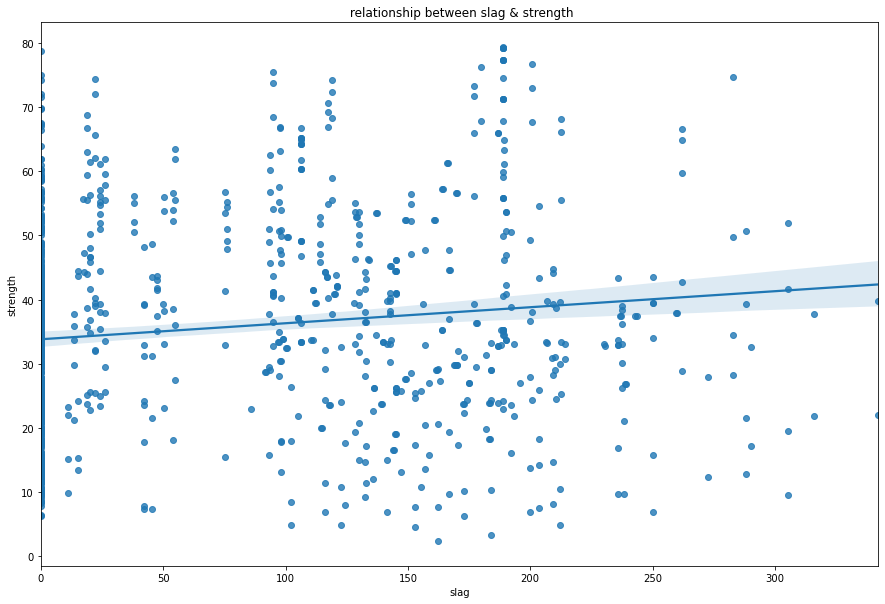

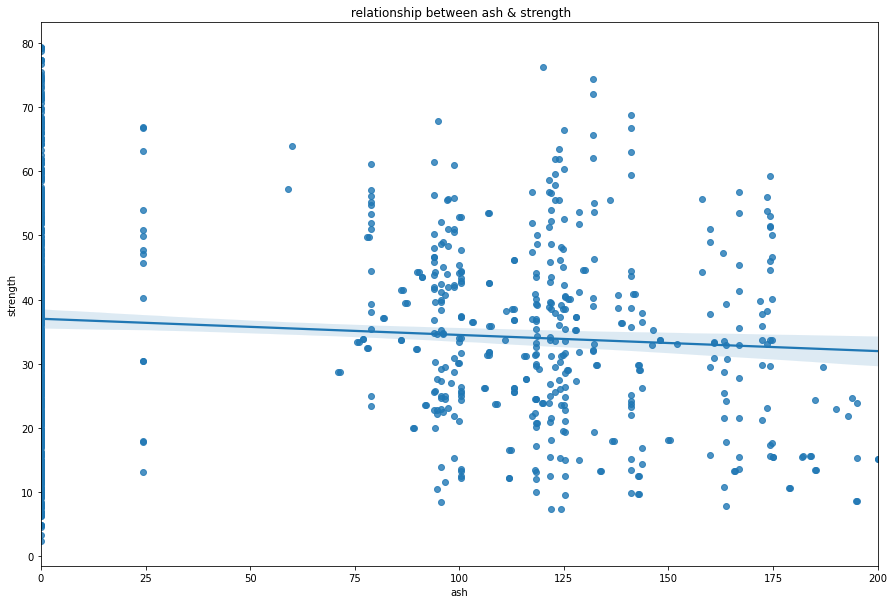

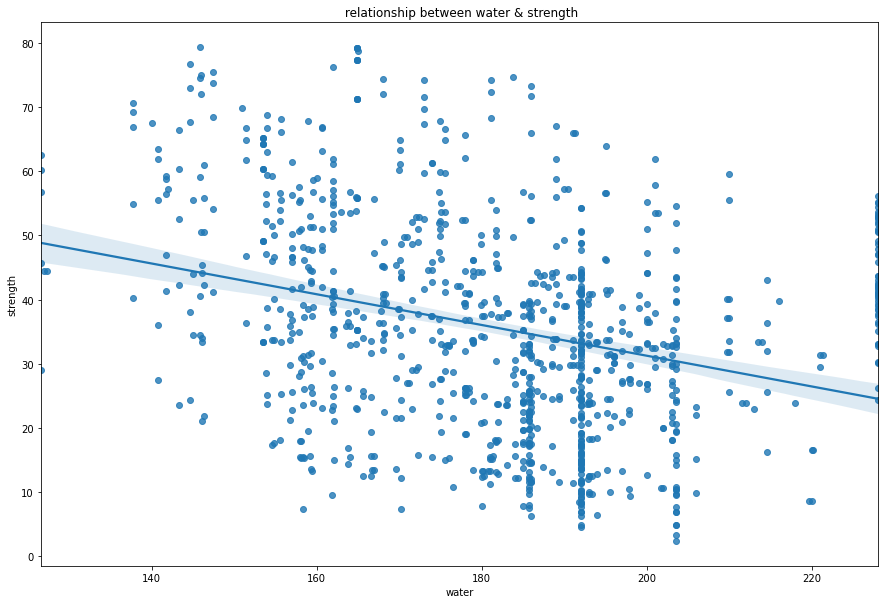

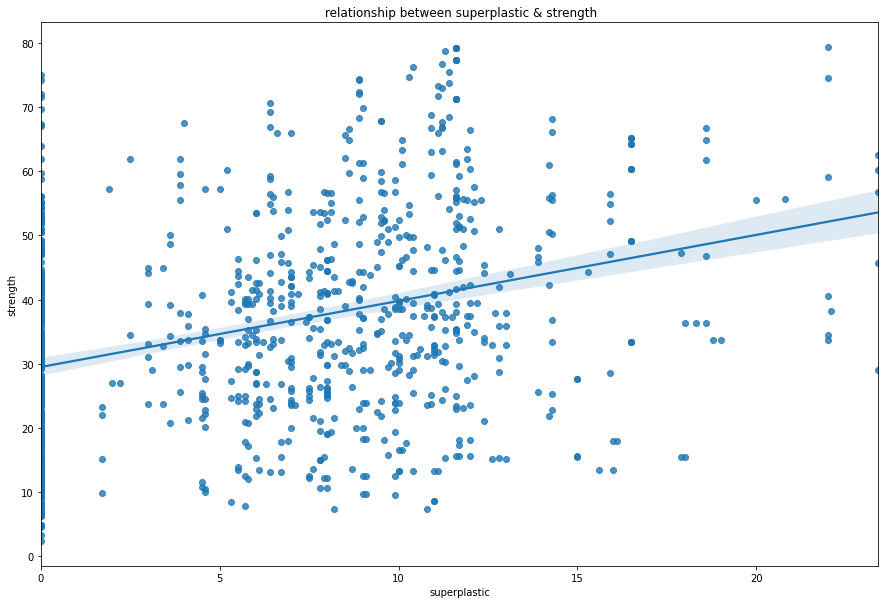

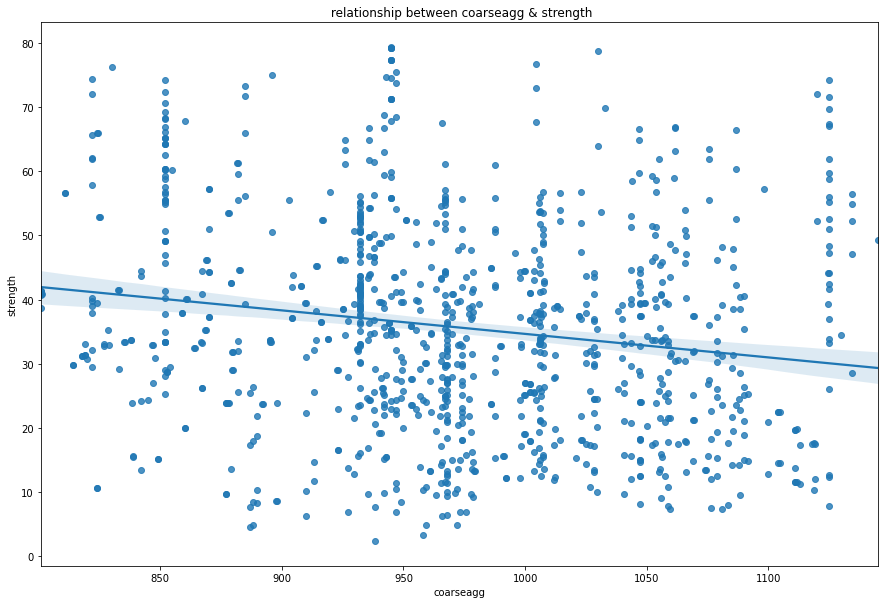

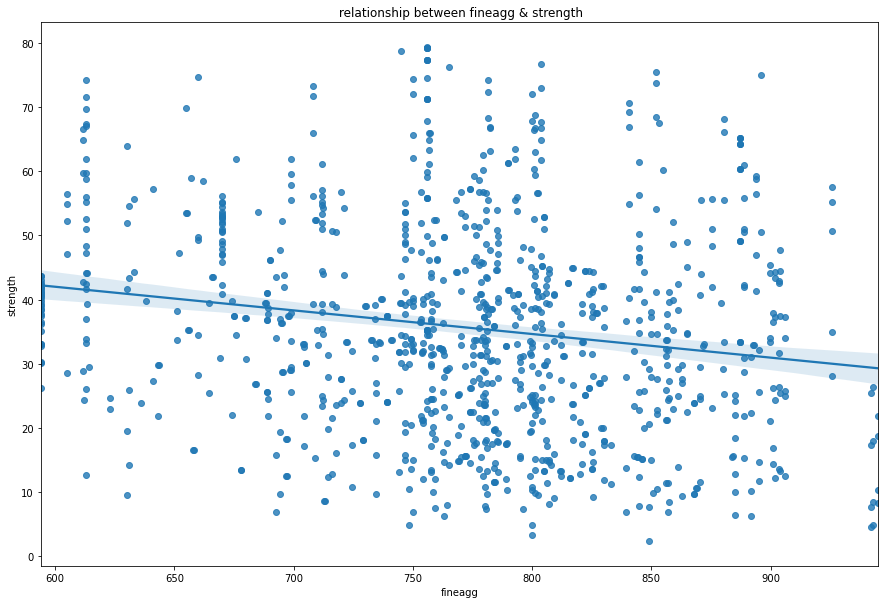

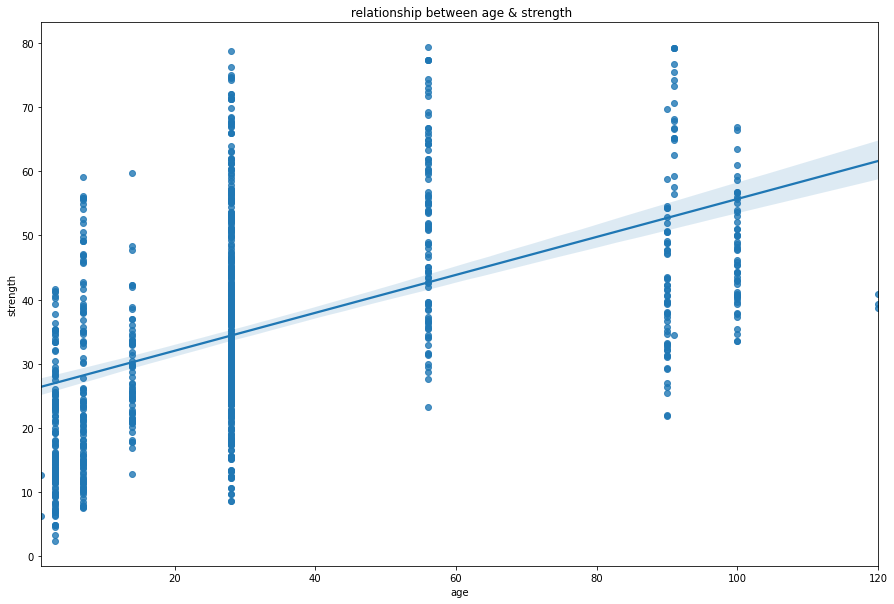

In [14]:
for col in list(df.columns): ## content of all the columns as well as values are converting in a list
    if col != 'strength':
        fig,ax1 = plt.subplots(figsize = (15,10) , sharex = False) ## sharex -- wants all the graph in different axis not all in x axis
        sns.regplot(x = df[col], y = df['strength'], ax=ax1).set_title(f' relationship between {col} & strength') ## shortcut for setting up the title

### 3. Plotting Correlation Plot (after point 2 because of multicolinearity)

In [15]:
correlation_matrix = df.corr()

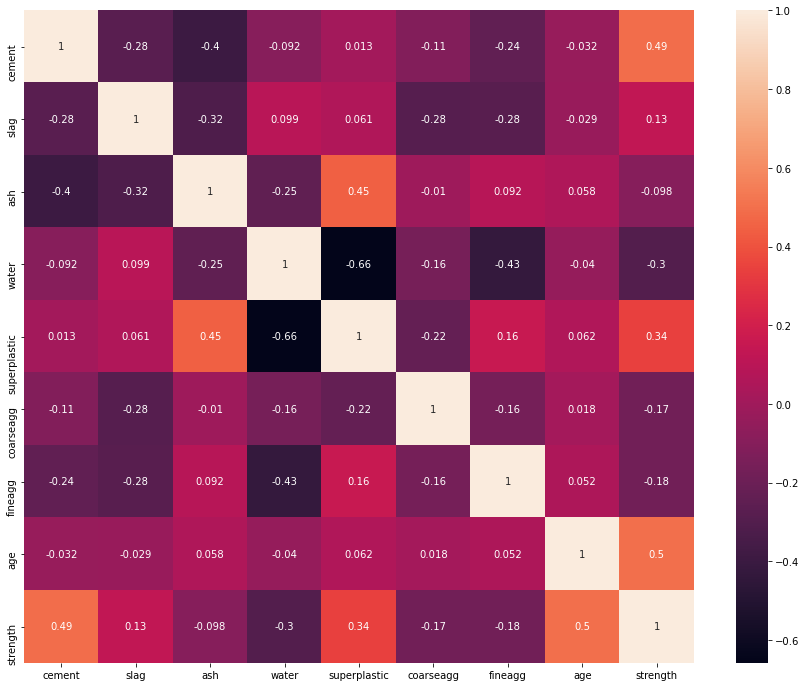

In [16]:
fig, ax = plt.subplots(figsize = (15,12))
sns.heatmap(correlation_matrix , annot = True )

In [17]:
## Between the features correlation should be 30% ( so as to avoid multicolinearity)
## Between the features & target it should be between 60-65% .

## Correlation DataFrame

In [18]:
def corrwithtarget(data,tcol): ## passing the data along with the target
    ind_var = data.drop([tcol],axis = 1).columns ## target variable should be drop.
    corr_result = []
    for col in ind_var:
        corr_result.append(data[tcol].corr(data[col])) ## updating the correlation with each column with target
    view_col = pd.DataFrame([ind_var,corr_result] , index = ['Variable','Correlation']).T.sort_values('Correlation',ascending = False) # cap T transpose the matrix
    return view_col                                                                                         ## Telling for highest variable with correlation is 
    

In [19]:
corrwithtarget(df,'strength')

,Variable,Correlation
7,age,0.499711
0,cement,0.493518
4,superplastic,0.342633
1,slag,0.129561
2,ash,-0.0979725
5,coarseagg,-0.173234
6,fineagg,-0.176113
3,water,-0.300043


## 2nd Method to find Multicolinearity  is known as VIF: Varaince Inflation Factor or Index

#### Cacluted using a formula :   1/(1-r^2) ... if VIF is more than 5, then there exist multicolinearity.
    --- 1.       Step -1 Regress every independent variable with each other & find the R square.
    ----2.       Step- 2 Find out the VIF using the mentioned Formula
    ----3.       Interpretation -- if value of VIF is more than 5 , the variable is highly correlated.

In [20]:
def Vif_colinearity(ind_var): ## only the ind_variable no target
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["vif_factor"] = [variance_inflation_factor(ind_var.values , i) for i in range(ind_var.shape[1])]
    vif["feature"] = ind_var.columns
    return vif.sort_values('vif_factor', ascending = False)
                                                                                      

In [21]:
Vif_colinearity(df.drop("strength", axis=1))

,vif_factor,feature
5,86.938582,coarseagg
3,81.963087,water
6,68.664404,fineagg
0,14.291158,cement
4,5.724145,superplastic
2,4.415840,ash
1,3.342314,slag
7,2.368372,age


In [22]:
## Treating the multilinearity 
## PCA
## or ref reduncancy elimination feature

## PCA

In [23]:
## used under two condition
## 1. high multilinearity
## 2. many features are there

In [24]:
def applyPCA(x):
    ncom = len(x.columns) ## n no. of.  components
    col = []
    from sklearn.preprocessing import StandardScaler 
    x = StandardScaler().fit_transform(x)
    
    
    from sklearn.decomposition import PCA
    
    for i in range(1,ncom):
        pca = PCA(n_components = i)
        p_components = pca.fit_transform(x)
        expvarratio = np.cumsum(pca.explained_variance_ratio_)
        
        if expvarratio[i-1] >= 0.9:
            n_components = i
            break
    print("Explained Variance Ratio after PCA is : ", expvarratio)
    
    
    ## Creating data Frame
    
    for j in range(1, n_components+1):
        col.append("Pc" + str(j))
    pcom = pd.DataFrame(data = p_components , columns = col)
    return pcom

In [25]:
transform_df = applyPCA(df.drop('strength', axis = 1))

Explained Variance Ratio after PCA is :  [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [26]:
transform_df = transform_df.join(df[['strength']] , how = 'left') ## joining the transform data with the strength

In [27]:
transform_df 

,Pc1,Pc2,Pc3,Pc4,Pc5,Pc6,strength
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110,29.89
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061,23.51
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045,29.22
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548,45.85
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228,18.29
...,...,...,...,...,...,...,...
1025,-1.743036,0.071059,-1.492203,0.045227,-0.449481,0.968953,13.29
1026,-1.079147,-0.572265,3.269799,-1.669125,-0.962953,0.002303,41.30
1027,-0.494143,1.276989,0.318398,-0.053272,-0.153787,0.751019,44.28
1028,2.688411,-0.236744,0.056551,-0.088955,0.105206,1.368321,55.06


In [28]:
Vif_colinearity(transform_df)

,vif_factor,feature
6,1.135446,strength
4,1.060757,Pc5
2,1.057055,Pc3
3,1.012314,Pc4
0,1.003242,Pc1
1,1.002070,Pc2
5,1.000008,Pc6


## MODEL BUILDING 
     3 stages of model building

# Function for Train Test Split

In [29]:
def TrainTestSplit(data , t_col, test_size = 0.3):
    x = data.drop(t_col, axis = 1)
    y = data[t_col]
    return train_test_split(x , y, test_size= test_size ,random_state = 50)

## Function for model Building

In [30]:
def build_model(modelname , model , data , t_col): ## here we have to pass PCA transformed data
    x_train , x_test , y_train , y_test = TrainTestSplit(data , t_col)
    model.fit(x_train , y_train)
    y_predict = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test , y_predict))
    r2Score = r2_score(y_test , y_predict)
    temp = [modelname , rmse , r2Score] ## just for understanding.. Its temporary
    return temp

In [31]:
Lr = LinearRegression()

In [34]:
build_model("Linear Regression" , Lr , transform_df , 'strength')

['Linear Regression', 9.171767967837697, 0.7100371520298294]

## Building Multiple Models

In [35]:
def multiple_models( data , t_col):
    col_names = ['Model_Name' , "RMSE" , "R_Square"]
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = build_model("Linear_Regression" , Lr , transform_df , 'strength') 
    result.loc[len(result)] = build_model("Lasso_Regression" , Lasso() , transform_df , 'strength')
    result.loc[len(result)] = build_model("Ridge_Regression" , Ridge() , transform_df , 'strength')
    result.loc[len(result)] = build_model("Decision_Tree_Regressor" , DecisionTreeRegressor(), transform_df , 'strength')
    result.loc[len(result)] = build_model("Gradient_Boosting_Regressor" , GradientBoostingRegressor() , transform_df , 'strength')    
    result.loc[len(result)] = build_model("AdaBoost_Regressor" , AdaBoostRegressor() , transform_df , 'strength')
    result.loc[len(result)] = build_model("Random_Forest_Regressor" , RandomForestRegressor() , transform_df , 'strength')  
    result.loc[len(result)] = build_model("XGB_Regressor" , XGBRegressor() , transform_df , 'strength') 
    result.loc[len(result)] = build_model("Support_Vector_Machine" , SVR() , transform_df , 'strength')
    result.loc[len(result)] = build_model("K_Nearest_Neighbor_Regessor" , KNeighborsRegressor() , transform_df , 'strength')
    result.loc[len(result)] = build_model("AdaBoost_Regressor" , AdaBoostRegressor() , transform_df , 'strength')
                                        
    return result

In [36]:
multiple_models(transform_df , 'strength')

,Model_Name,RMSE,R_Square
0,Linear_Regression,9.171768,0.710037
1,Lasso_Regression,9.625852,0.680615
2,Ridge_Regression,9.173294,0.709941
3,Decision_Tree_Regressor,6.949786,0.833513
4,Gradient_Boosting_Regressor,6.714578,0.844592
5,AdaBoost_Regressor,8.436895,0.754641
6,Random_Forest_Regressor,6.080394,0.872562
7,XGB_Regressor,6.095381,0.871933
8,Support_Vector_Machine,9.438373,0.692935
9,K_Nearest_Neighbor_Regessor,8.221128,0.767030


##   Function for Model Building with K-Fold Cross Validation

In [56]:
def kfold_cv(x , y, fold = 10):
    lr = LinearRegression()
    lasso_Model = Lasso()
    Ridge_Model = Ridge()
    RandomForest = RandomForestRegressor()
    Dt = DecisionTreeRegressor()
    Knn = KNeighborsRegressor()
    AdaBoost = AdaBoostRegressor()
    Svr = SVR()
    Xg = XGBRegressor()
    gb = GradientBoostingRegressor()
    
    score_lr = cross_val_score(lr , x , y , cv = fold)
    score_lasso = cross_val_score(lasso_Model , x , y , cv = fold)
    score_ridge = cross_val_score(Ridge_Model, x , y , cv = fold)
    score_random = cross_val_score(RandomForest , x , y , cv = fold)
    score_dt = cross_val_score(Dt , x , y , cv = fold)
    score_knn = cross_val_score(Knn, x , y , cv = fold)
    score_adaboost = cross_val_score(AdaBoost, x , y , cv = fold)
    score_Svm = cross_val_score(Svr, x , y , cv = fold)
    score_Xg = cross_val_score(Xg, x , y , cv = fold)
    score_gb = cross_val_score(gb , x , y , cv = fold)
    
    models = [lr , lasso_Model , Ridge_Model , RandomForest , Dt , Knn , AdaBoost , Svr , Xg , gb]
    model_names = ["Linear Regression" , "Lasso" , "Ridge" , "Random Forest" , "Decision Tree" , "KNN" , "Adaboost" , "SVM" , "XGBoost" , "Gradient Boost"]
    Scores = [score_lr , score_lasso , score_ridge , score_random , score_dt , score_knn ,score_adaboost , score_Svm ,score_Xg ,score_gb ]
    ## scores lr me poore accuracy hogi 10 fold tak.
    
    result = []
    for idx in range(0 , len(models)): ## idx just a variable like we write for x in range...
        print(model_names[idx])
        score_mean = np.mean(Scores[idx])
        score_std = np.std(Scores[idx])
        n_names = model_names[idx]
        temp = [n_names , score_mean , score_std]
        result.append(temp)
        
    result_df = pd.DataFrame(result , columns =["Model Name" , "Average Accuracy" , "Std. Deviation"])
    
    return result_df

In [57]:
x = df.drop('strength' , axis = 1)

In [58]:
y = df[['strength']]

In [59]:
kfold_cv(x , y)

Linear Regression
Lasso
Ridge
Random Forest
Decision Tree
KNN
Adaboost
SVM
XGBoost
Gradient Boost


,Model Name,Average Accuracy,Std. Deviation
0,Linear Regression,0.686929,0.062430
1,Lasso,0.686684,0.062488
2,Ridge,0.686929,0.062431
3,Random Forest,0.886271,0.033765
4,Decision Tree,0.830062,0.052424
5,KNN,0.667985,0.086449
6,Adaboost,0.745241,0.032112
7,SVM,0.233500,0.038865
8,XGBoost,0.902312,0.041982
9,Gradient Boost,0.877583,0.044882


In [60]:
## We will choose those models -- where average accuracy of the & Std deviation of the average accuracy should be less.

In [61]:
## -- We have to hyper tune all the models excpt Random Forest & Adaboost & Linear Regression.